In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data/PRSA_data_2010.1.1-2014.12.31.csv')
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [4]:
data.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [5]:
data.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [6]:
data['pm2.5'].isna().sum()

2067

In [7]:
data = data.iloc[24:].fillna(method='ffill')
data['pm2.5'].isna().sum()
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [8]:
import datetime
datetime.datetime(year=2010,month=1,day=2,hour=1)


datetime.datetime(2010, 1, 2, 1, 0)

In [9]:
data['tm'] = data.apply(
    lambda x: datetime.datetime(
        year=x['year'],
        month=x['month'],
        day=x['day'],
        hour=x['hour']
    ),
    axis=1
)

data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,tm
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [10]:
data.drop(columns=['year','month','day','hour','No'],inplace=True)

data = data.set_index('tm')

data

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
tm,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [11]:
data.cbwd.unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [12]:
data = data.join(pd.get_dummies(data.cbwd))
data.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0,0,0,1,0


In [13]:
del data['cbwd']
data

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0


<AxesSubplot:xlabel='tm'>

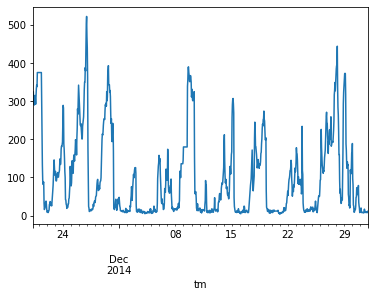

In [14]:
data['pm2.5'][-1000:].plot()

<AxesSubplot:xlabel='tm'>

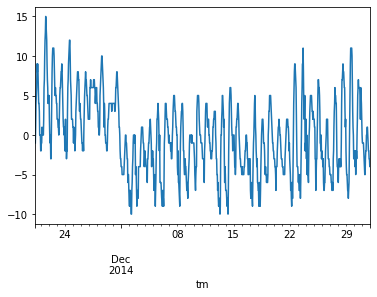

In [15]:
data['TEMP'][-1000:].plot()


In [16]:
seq_length = 5*24  #观测的历史数据长度
delay = 24         #预测的未来时间长度

In [17]:
data_ = []
for i in range(len(data)-seq_length-delay):
    data_.append(data.iloc[i:i+seq_length+delay])


In [18]:
data_[0].shape

(144, 11)

In [19]:
data_ = np.array([df.values for df in data_])
data_.shape

(43656, 144, 11)

In [20]:
np.random.shuffle(data_)


In [21]:
x = data_[:,:seq_length,:]

In [22]:
y = data_[:,-1,0]
y.shape

(43656,)

In [23]:
split_b = int(data_.shape[0]*0.8)
train_x = x[:split_b]
train_y = y[:split_b]
test_x = x[split_b:]
test_y = y[split_b:]

In [24]:
train_x.shape,train_y.shape

((34924, 120, 11), (34924,))

In [25]:
mean_ = train_x.mean(axis=0)
std_ = train_x.std(axis=0)
train_x = (train_x - mean_)/std_
test_x = (test_x - mean_)/std_

In [26]:
batch_size =128


In [28]:
# 全连接网络
model = keras.Sequential()
model.add(layers.Flatten(input_shape=(train_x.shape[1:])))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mae'])

history = model.fit(train_x,
                    train_y,
                    batch_size=batch_size,
                    epochs=50,
                    validation_data=(test_x,test_y))

Epoch 1/50
273/273 [==============================] - 1s 2ms/step - loss: 10344.0684 - mae: 72.6854 - val_loss: 8449.0527 - val_mae: 67.8687
Epoch 2/50
273/273 [==============================] - 0s 2ms/step - loss: 7756.6968 - mae: 65.0071 - val_loss: 7486.6670 - val_mae: 63.3026

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

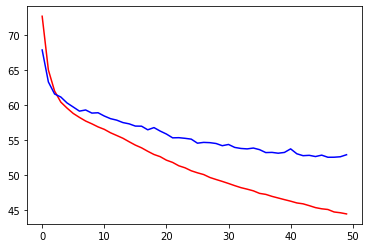

In [31]:
plt.plot(history.epoch,history.history['mae'],c='r')
plt.plot(history.epoch,history.history['val_mae'],c='b')

# LSTM模型


In [33]:
model = keras.Sequential()
model.add(layers.LSTM(32,
                      input_shape=(seq_length,train_x.shape[-1]),
                      return_sequences=True
                      ))
model.add(layers.LSTM(32,return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(1))

lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',
                                            patience=3,
                                            factor=0.5,
                                            min_lr=1e-6
                                           )

model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mae'])

history = model.fit(train_x,
                    train_y,
                    batch_size=batch_size,
                    epochs=150,
                    callbacks=[lr_reduce],
                    validation_data=(test_x,test_y))

Epoch 1/150
273/273 [==============================] - 9s 25ms/step - loss: 16051.8740 - mae: 88.2019 - val_loss: 15685.8779 - val_mae: 85.5779

In [34]:
model.save('model/pm2.5_v3.h5')

使用模型进行预测


In [36]:
model.evaluate(test_x,test_y,verbose=0)

[2077.18408203125, 29.164112091064453]

In [37]:
pre_test=model.predict(test_x)
pre_test[:5]

array([[237.52295 ],
       [159.34602 ],
       [ 70.100395],
       [288.1912  ],
       [ 37.018837]], dtype=float32)

In [42]:
data_test = data[-120:]
data_test

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,
2014-12-27 00:00:00,163.0,-10,-5.0,1030.0,1.79,0,0,0,1,0,0
2014-12-27 01:00:00,194.0,-10,-5.0,1030.0,3.58,0,0,0,1,0,0
2014-12-27 02:00:00,187.0,-10,-5.0,1030.0,5.37,0,0,0,1,0,0
2014-12-27 03:00:00,216.0,-11,-6.0,1030.0,7.16,0,0,0,1,0,0
2014-12-27 04:00:00,225.0,-11,-6.0,1030.0,8.95,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0


In [43]:
data_test = (data_test-mean_)/std_
data_test = data_test.to_numpy()
data_test.shape


(120, 11)

In [44]:
data_test = np.expand_dims(data_test,axis=0)
data_test.shape

(1, 120, 11)

In [45]:
model.predict(data_test)

array([[57.816025]], dtype=float32)

In [46]:
data.tail()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0
2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0
2014-12-31 23:00:00,12.0,-21,-3.0,1034.0,249.85,0,0,0,1,0,0
